In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [116]:
from sklearn.datasets import load_digits

In [117]:
digits = load_digits()

In [118]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [119]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [120]:
s = digits.images[0]

In [121]:
s

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [122]:
df['target'] = digits.target

In [123]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [124]:
df.shape

(1797, 65)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

<Figure size 640x480 with 0 Axes>

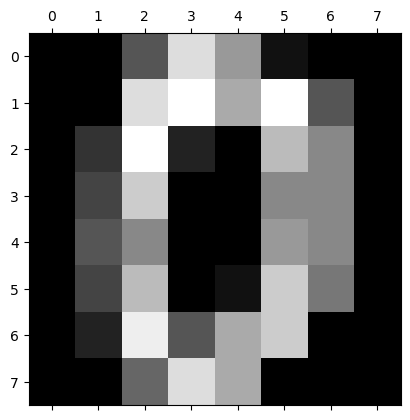

In [126]:
plt.gray()
plt.matshow(s)
plt.show()

In [127]:
X = df.drop("target", axis = 1)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [128]:
y = df.target
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [131]:
X_train.shape

(1437, 64)

In [132]:
X_test.shape

(360, 64)

In [133]:
y_test.shape

(360,)

In [134]:
model = LogisticRegression(max_iter=2000)

In [135]:
model.fit(X_train, y_train)

C:\Users\praja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [136]:
model.score(X_test, y_test)

0.9722222222222222

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model = DecisionTreeClassifier()

In [139]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
model.score(X_test, y_test)

0.85

In [141]:
from sklearn import tree


[Text(0.24764562877643503, 0.96875, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [145, 154, 144, 149, 135, 135, 146, 145, 144, 140]'),
 Text(0.05891238670694864, 0.90625, 'X[42] <= 5.0\ngini = 0.539\nsamples = 223\nvalue = [143, 0, 3, 1, 6, 17, 4, 0, 3, 46]'),
 Text(0.030211480362537766, 0.84375, 'X[21] <= 6.5\ngini = 0.376\nsamples = 59\nvalue = [0, 0, 1, 1, 0, 12, 0, 0, 0, 45]'),
 Text(0.01812688821752266, 0.78125, 'X[4] <= 8.0\ngini = 0.272\nsamples = 13\nvalue = [0, 0, 1, 0, 0, 11, 0, 0, 0, 1]'),
 Text(0.012084592145015106, 0.71875, 'X[45] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.006042296072507553, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.01812688821752266, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.02416918429003021, 0.71875, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 11, 0, 0, 0, 0]'),
 Text(0.04229607250755287, 0.78125, 'X[33] <= 1.5\ngin

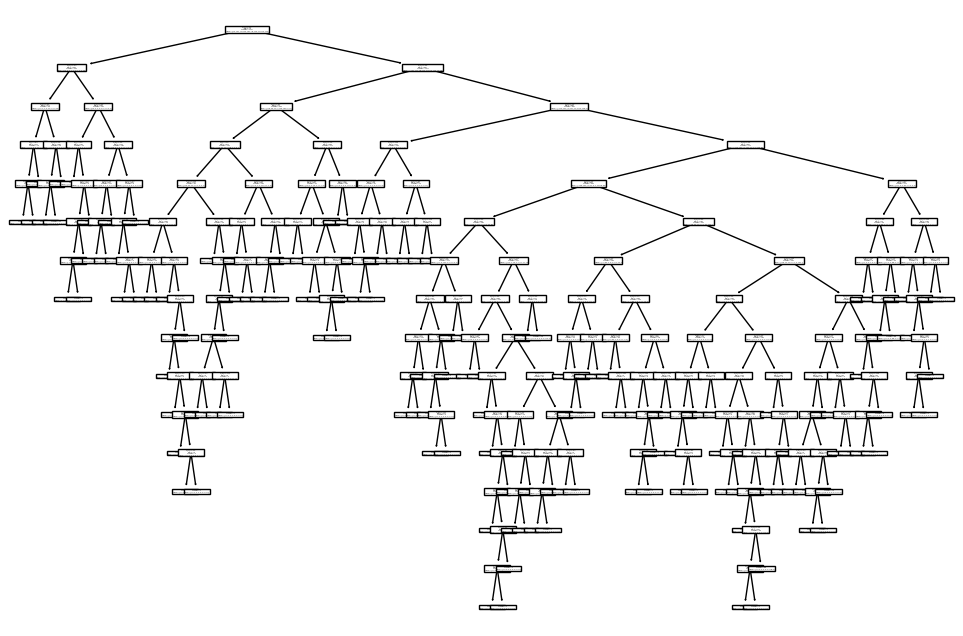

In [142]:
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train, y_train))

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier()

In [145]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9722222222222222

In [146]:
from sklearn.ensemble import AdaBoostClassifier

- without hyperparameter tunning

In [147]:
ad = AdaBoostClassifier()

In [148]:
ad.fit(X_train, y_train)
ad.score(X_test, y_test)

0.21944444444444444

- With hyper tunning parameter

In [149]:
ad = AdaBoostClassifier(learning_rate=0.01, n_estimators=90)
ad.fit(X_train, y_train)
ad.score(X_test, y_test)

0.7111111111111111

In [150]:
import xgboost

In [151]:
boost = xgboost.XGBClassifier()

In [152]:
y_train

1734    6
855     0
1642    0
175     3
925     0
       ..
1130    3
1294    7
860     2
1459    7
1126    1
Name: target, Length: 1437, dtype: int32

In [153]:
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [154]:
boost.score(X_test, y_test)

0.9694444444444444

In [156]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9694444444444444


In [ ]:
predictions = boost.predict(X_test)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

- parameters

In [157]:
boost = xgboost.XGBClassifier(n_estimators = 300)

In [158]:
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.9722222222222222